# Задача 1

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gen_hilbert(n):
    row = np.arange(1, n+1)
    col = np.arange(1, n+1)
    rs, cls = np.meshgrid(row, col)
    A = 1 / (rs+cls-1)
    f = np.sum(A, axis=1)
    return (A, f)

In [24]:
def grad_desc(A, b, eps=1e-8, count=False):
    b = np.reshape(b, (-1, 1))
    x = np.zeros(b.shape)
    r = A @ x - b
    t = (r.T @ r) / ((A @ r).T @ r)
    xn = x - t*r
    k = 1
    while(np.linalg.norm(r, ord=2) > eps):
        x = xn
        r = A @ x - b
        t = (r.T @ r) / ((A @ r).T @ r)
        xn = x - t*r
        k += 1
    if(count):
        return (xn, k)
    else:
        return xn

In [25]:
A, f = gen_hilbert(4)
print(A, f ,sep='\n')
x, k = grad_desc(A, f, count=True)
print(x)
print(k)
print(A @ x - f.reshape(x.shape))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
[2.08333333 1.28333333 0.95       0.75952381]
[[1.00000224]
 [0.99997471]
 [1.00006087]
 [0.99996042]]
43592
[[-6.34855724e-09]
 [-6.18871443e-09]
 [ 3.21612759e-09]
 [-5.91632887e-09]]


In [33]:
N = 100
eps = 1e-5
ns = np.arange(2, N)
ops = []
for n in ns:
    A, f = gen_hilbert(n)
    x, k = grad_desc(A, f, eps=eps, count=True)
    ops.append(k)   

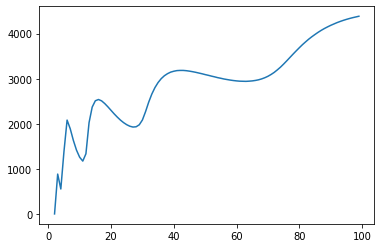

In [34]:
plt.plot(ns, ops)
plt.show()

Видны какие-то странные осцилляции необходимого числа итераций

# Задача 2

In [43]:
def conj_grad(A, b, eps=1e-8, count=False):
    b = b.reshape((-1, 1))

    k = 1
    
    x = np.zeros(b.shape)
    r = b - A @ x
    p = r
    
    # step
    alpha = (r.T @ r) / ((A @ p).T @ p)
    xn = x + alpha*p
    rn = r - alpha *A @ p
    beta = (rn.T @ rn) / (r.T @ r)
    pn = rn + beta*p
    
    
    while(np.linalg.norm(rn, ord=2) > eps):
        x = xn
        r = rn
        p = pn
        
        alpha = (r.T @ r) / ((A @ p).T @ p)
        xn = x + alpha*p
        rn = r - alpha *A @ p
        beta = (rn.T @ rn) / (r.T @ r)
        pn = rn + beta*p
        
        k += 1
        
    if count:
        return (xn, k)
    else:
        return xn

In [49]:
N = 100
eps = 1e-13
ns = np.arange(2, N)
ops = []
for n in ns:
    A, f = gen_hilbert(n)
    x, k = conj_grad(A, f, eps=eps, count=True)
    ops.append(k)   

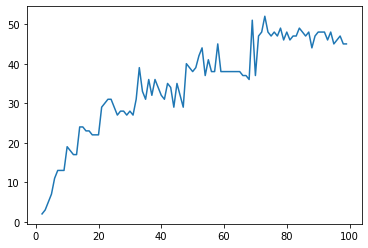

In [50]:
plt.plot(ns, ops)
plt.show()

Сходимость метода невероятно быстрая. Слегка проглядываются (на малых точностях видны лучше) плато, где число итераций постоянно.

# Задача 3

In [51]:
def generate_sym_pos(n):
    B = 10 - 20*np.random.rand(n, n)
    A = B.T @ B
    b = (10 - 20*np.random.rand(n)).reshape((-1, 1))
    return (A, b)

In [72]:
def iterate_methods(A, b, N=20):
    b = np.reshape(b, (-1, 1))
    rfgd = []
    rcg = []
    
    
    x = np.zeros(b.shape)
    r = A @ x - b
    t = (r.T @ r) / ((A @ r).T @ r)
    xn = x - t*r
    for _ in range(N):
        x = xn
        r = A @ x - b
        rfgd.append(np.linalg.norm(r, ord=2))
        t = (r.T @ r) / ((A @ r).T @ r)
        xn = x - t*r

    
    x = np.zeros(b.shape)
    r = b - A @ x
    p = r
    
    # step
    alpha = (r.T @ r) / ((A @ p).T @ p)
    xn = x + alpha*p
    rn = r - alpha *A @ p
    beta = (rn.T @ rn) / (r.T @ r)
    pn = rn + beta*p  
    
    for _ in range(N):
        x = xn
        r = rn
        p = pn
        
        alpha = (r.T @ r) / ((A @ p).T @ p)
        xn = x + alpha*p
        rn = r - alpha *A @ p
        beta = (rn.T @ rn) / (r.T @ r)
        pn = rn + beta*p
            
        rcg.append(np.linalg.norm(rn, ord=2))
    
    return (rfgd, rcg)

In [77]:
n = 20
N = 30
pts = np.arange(N)

A, b = generate_sym_pos(n)
rfgd, rcg = iterate_methods(A, b, N)

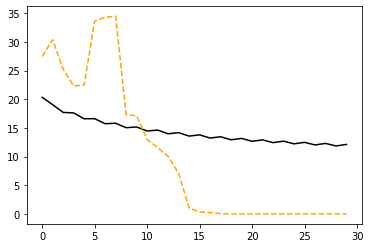

In [79]:
plt.plot(pts, rfgd, 'k-')
plt.plot(pts, rcg, c='orange', linestyle='dashed')
plt.show()

In [104]:
n = 200
N = 300
pts = np.arange(N)

A, b = generate_sym_pos(n)
rfgd, rcg = iterate_methods(A, b, N)

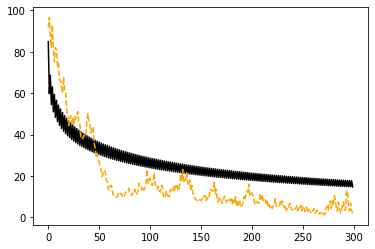

In [105]:
plt.plot(pts, rfgd, 'k-')
plt.plot(pts, rcg, c='orange', linestyle='dashed')
plt.show()

Если потыкать, оказывается, что метод сопряженных градиентов в данном эксперименте нестабилен.

# Задача 4

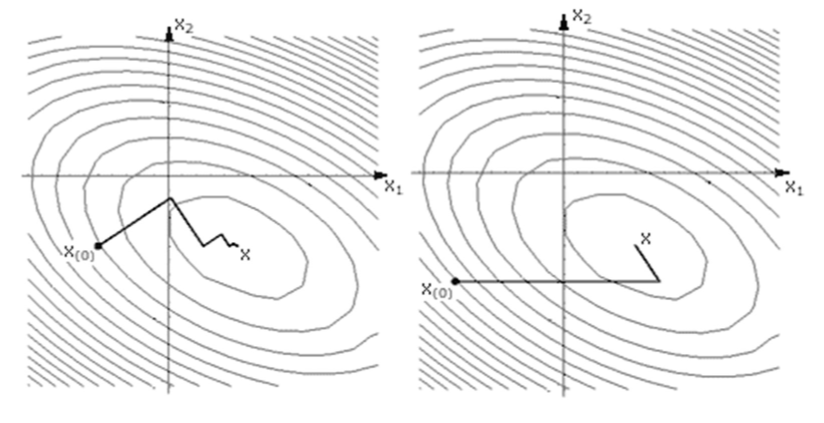

Замкнутые линии - это линии уровня, т.е. на нах функционал постоянен.

Метод сопряженных градиентов на втором рисунке, т.к. в теории он сходится на плоскости за не более чем 2 итерации. На первом - метод наискорейшего спуска соответственно. Он всегда начинает движение перпендикулярно линиям уровня и по природе своей итерационен. Кроме того, видно, что он останавливается в точках, где линии хода параллельны линиям уровня.

МСГ позволяет решить задачу за конечное число шагов, т.к. по своей природе и построению он дает $k$-ую невязку сопряженной ко всем предыдущим. Т.к. пространство конечномерно, рано или поздно $m$ невязок образуют базис и все последующие в силу свойства замкнутости базиса равны нулю, т.к. приближения выше $m$-го точные. Для матрица размера $n\times n$ максимальное количество шагов равно очевидно $n$.

# Задача 5

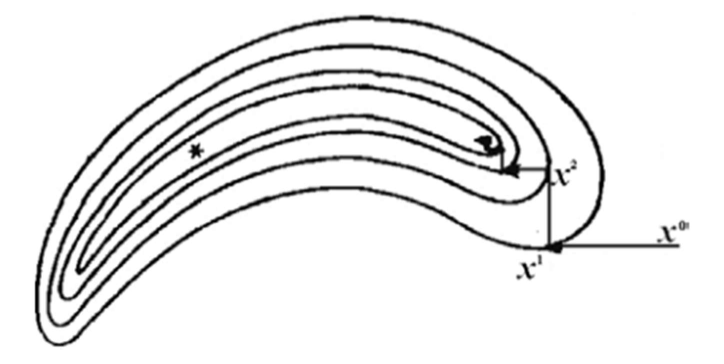

В овражном случае градиент направлен перпендикулярно оврагу и приближения соответственно рассыпаны перпендикулярно ему. При этом может произойти ситуация, что шаги вдоль оврага (небольшие), приводящие к необходимой точности в этом направлении произойдут либо когда приближение лежит далеко в сторону наискорейшего роста функционала, либо вообще происходят вместе с сильным отдалениям в перпендикулярном направлении. Если изображать требуемую невязку в виде сферы, получится, что в нее сложнее попасть сразу по всем осям, хотя в различные цилиндры приближения попадают не реже чем в неовражном случае. 

Связь с сингулярными значениями относительная, т.е. ситуация оврага наступает если некоторое сингулярное число больше другого, т.е. велико их отношение. А это и есть по сути число обусловленности.

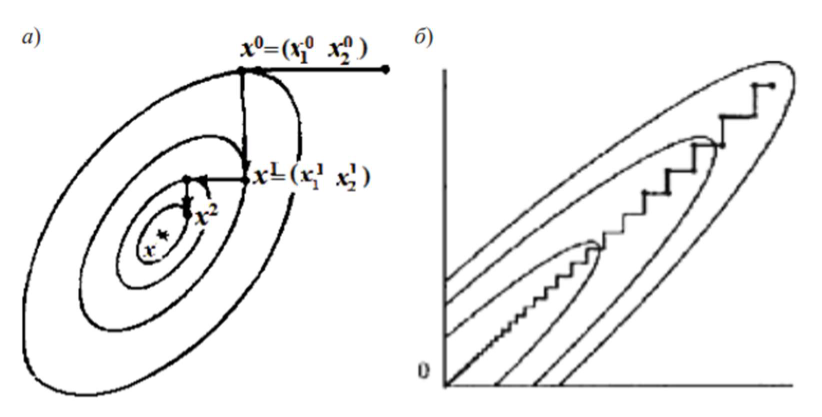

Как видно из сравнения рисунков, для итерации по оврагу требуется гораздо больше шагов, т.к. их нужно делать небольшими (у краев оврага сильная кривизна и поэтому даже наискорейший спуск идет небольшими шагами).

# Задача 6

Как минимум утверждение неверно, если $v$ - собственный вектор $A$

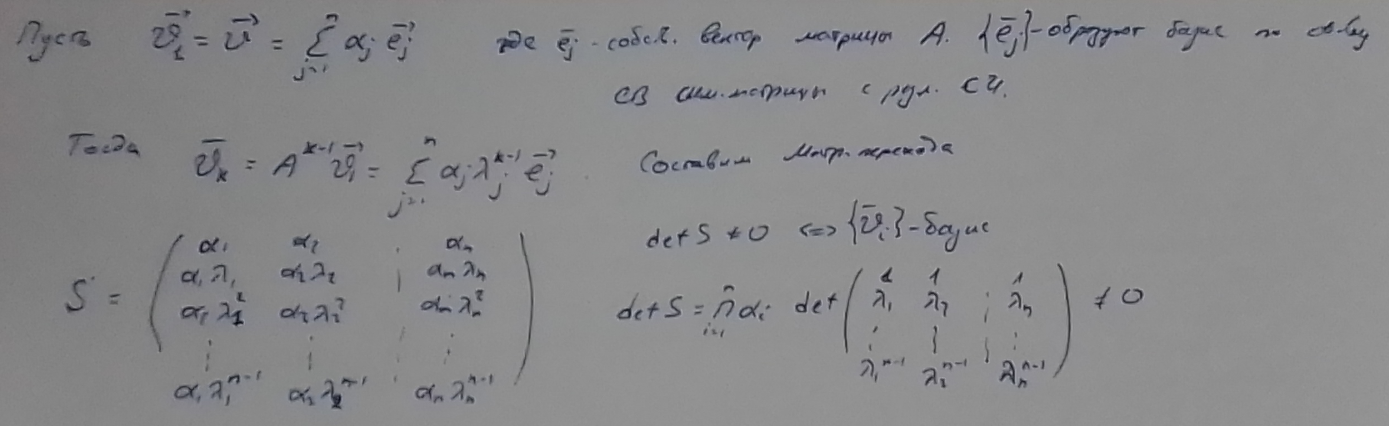
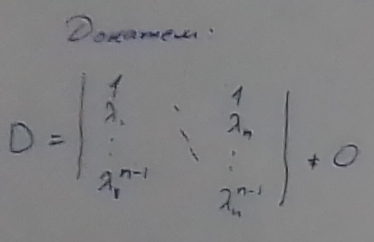
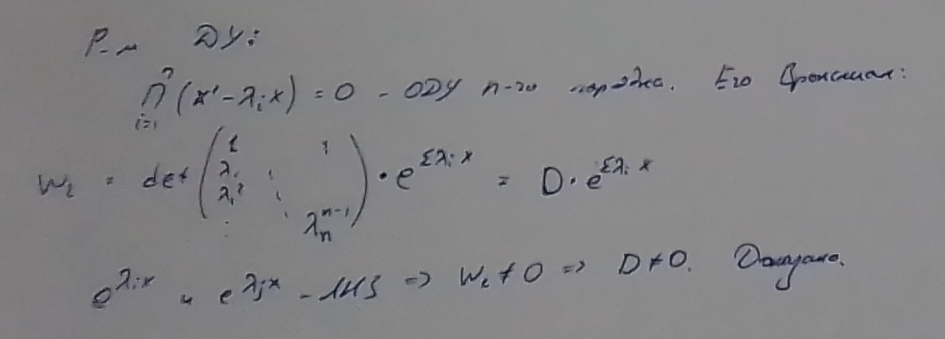

При наличии одинаковых собственных чисел, вронскиан 0 и размерность лин оболочки таких v меньше n. Оставим в исходном разложении только различные $\lambda$ (мы просто подберем вместо комбинации с одинаковыми собственными числами новый вектор (один!) из соответствующего собственного подпространства A). Далее вывод не меняется. Получаем, что если имеется матрица $n\times n$ с собственными числами кратностей $k_1, k_2, \dots k_m$ то размерность подпространства Крылова равна $m$